###Preprocesamiento de datos

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
df = pd.read_csv("dataset2.csv", header=0)
df.describe()

,price,crime_rate
count,506.000000,506.000000
mean,22.528854,3.613524
std,9.182176,8.601545
min,5.000000,0.006320
25%,17.025000,0.082045
50%,21.200000,0.256510
75%,25.000000,3.677083
max,50.000000,88.976200


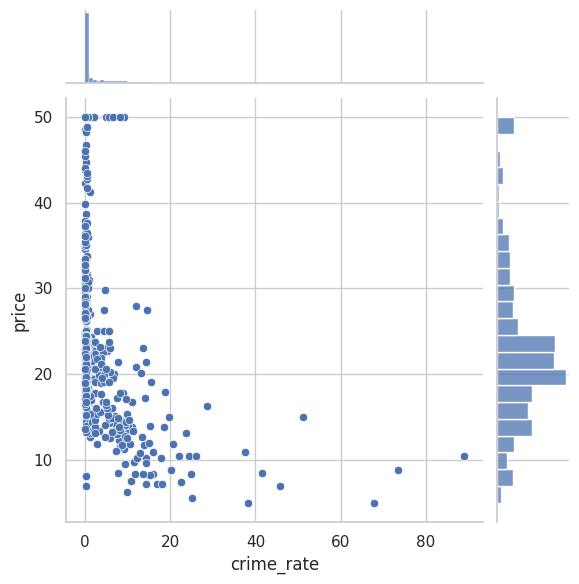

In [2]:
sns.set(style='whitegrid', context='notebook')
sns.jointplot(x="crime_rate", y="price", data=df)

<Axes: >

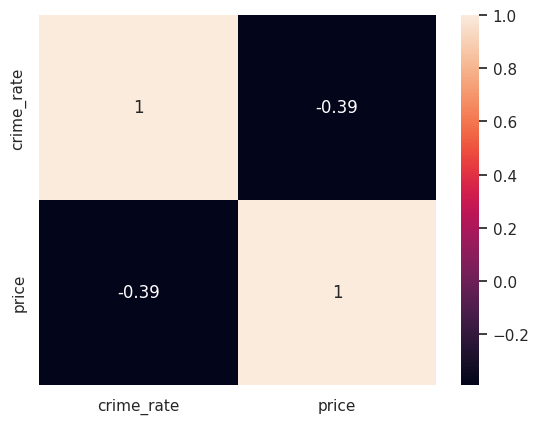

In [3]:
def diagmostic_grafic(df, variable):
  plt.figure(figsize=(15,6))
  plt.subplot(1,2,1)
  plt.title(variable)
  df[variable].hist(bins=30, edgecolor='black')
  plt.subplot(1,2,2)
  stats.probplot(df[variable], dist='norm', plot=plt)
  plt.title('Gráfico Q-Q')
  plt.show()

cols = ["crime_rate", "price"]
sns.heatmap(
    data=df[cols].corr(),
    cbar=True, annot=True, yticklabels=cols, xticklabels=cols)

###Transformación de datos

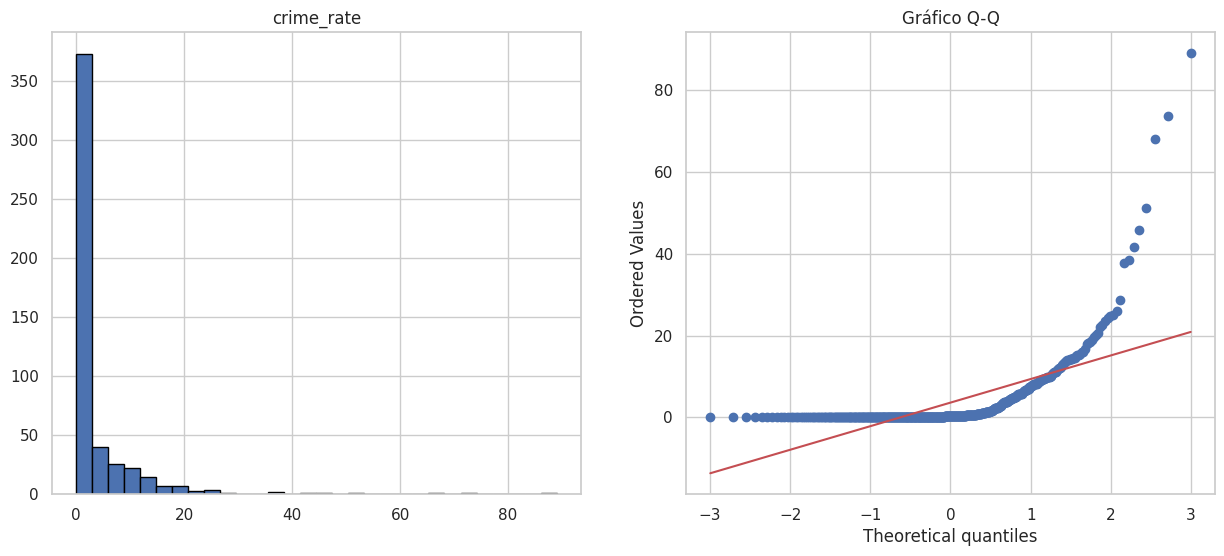

In [4]:
diagmostic_grafic(df, 'crime_rate')

Prueba de shapiro:  0.9433838725090027


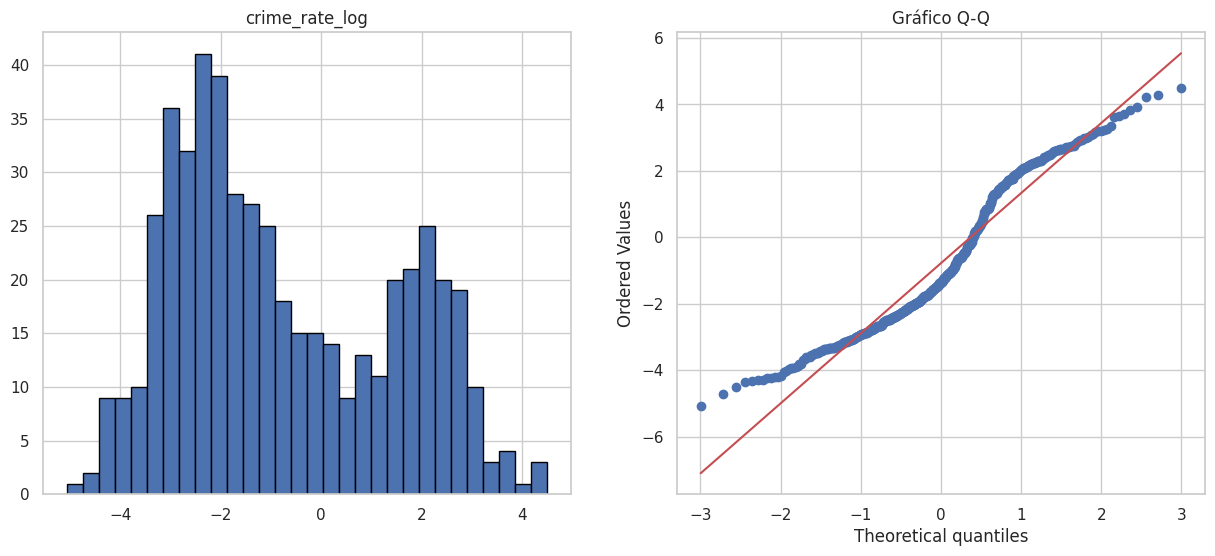

In [5]:
#Dada la gráfica podemos observar que lo mejor es realizar una tranformación logaritmica
df['crime_rate_log'] = np.log(df['crime_rate'])

from scipy import stats #para realizar la prueba de normalidad shapiro
res = stats.shapiro(df['crime_rate_log'])
print("Prueba de shapiro: ",res.statistic)

diagmostic_grafic(df, 'crime_rate_log')

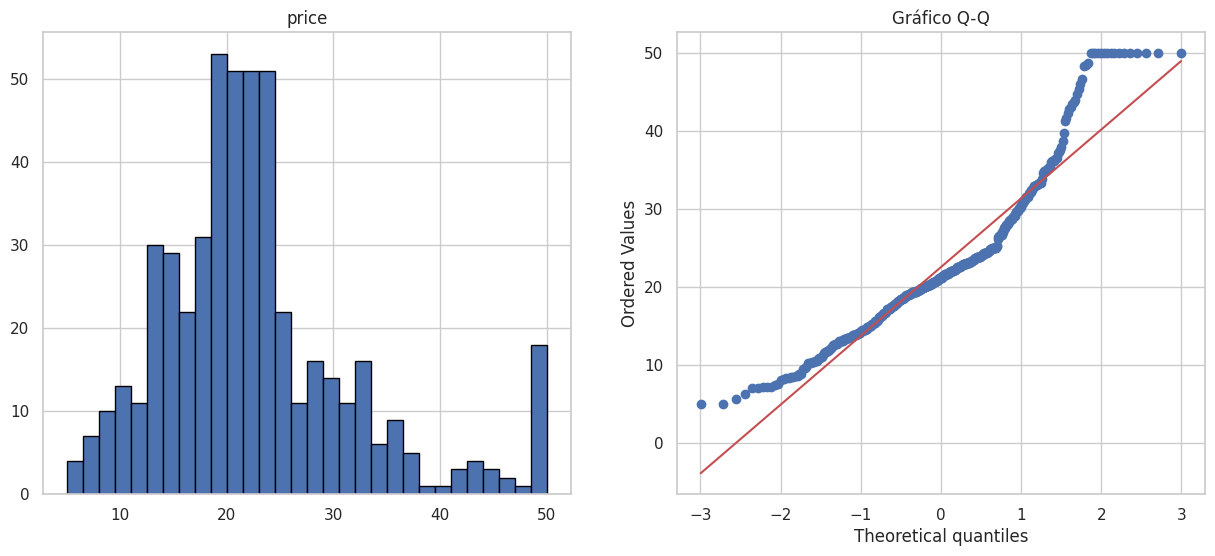

In [6]:
diagmostic_grafic(df, 'price')

Prueba de shapiro:  0.975231409072876


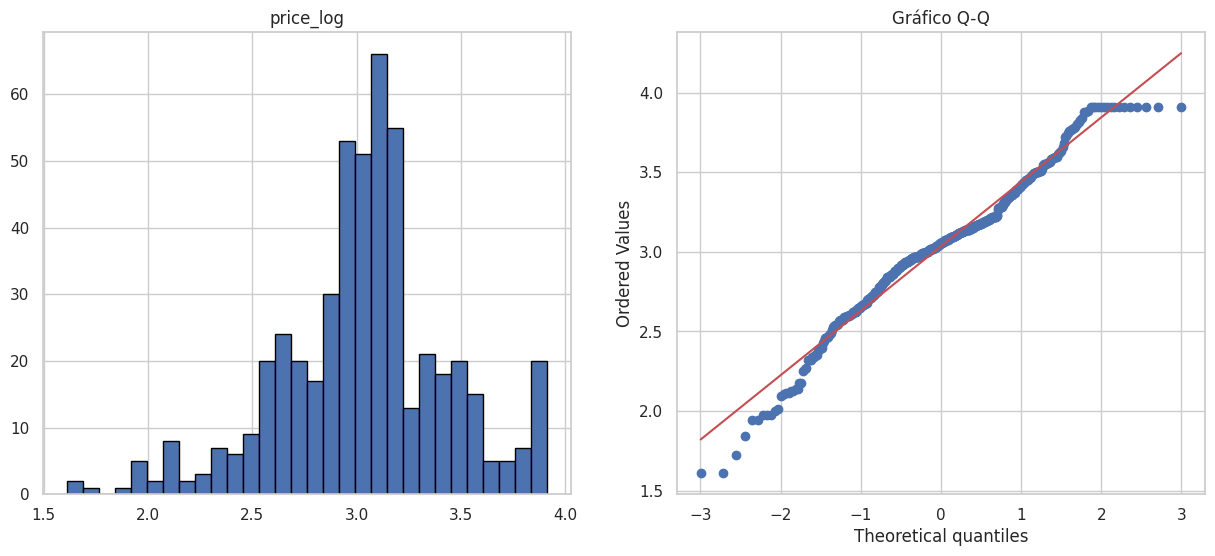

In [7]:
df['price_log'] = np.log(df['price'])
res = stats.shapiro(df['price_log'])
print("Prueba de shapiro: ",res.statistic)
diagmostic_grafic(df, 'price_log')

<Axes: >

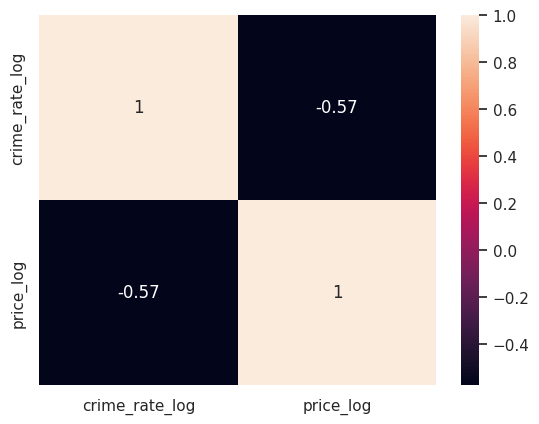

In [8]:
cols = ["crime_rate_log", "price_log"]
sns.heatmap(
    data=df[cols].corr(),
    cbar=True, annot=True, yticklabels=cols, xticklabels=cols)

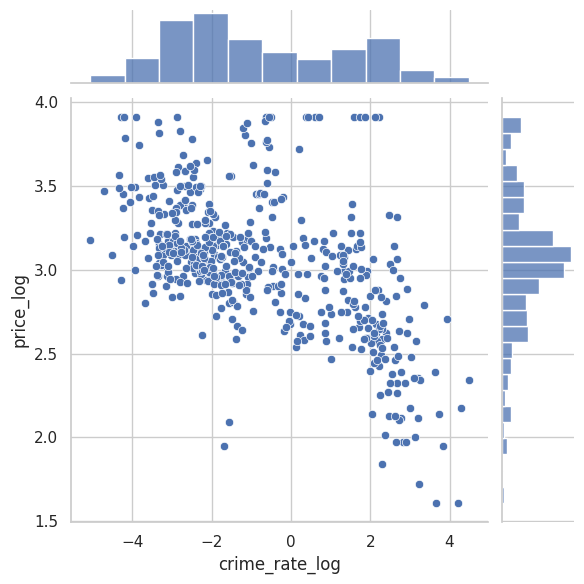

In [9]:
sns.jointplot(x="crime_rate_log", y="price_log", data=df)

Hasta aquí, logramos mejorar bastante la correlación existente entre nuestra característica y la variable objetivo, procederemos a realizar la regresión lineal

###Regresión lineal (OLS)

Los resultados para regresión lineal: 

Intercepto: 2.9503 , coeficiente: -0.1080
El R^2 en training es:0.33214236227345795 y en test es:0.3129983776835218
El MSE en training es:0.10924410619682594 y en test es:0.11826219994370134
El MAE en training es:0.2486377922968135 y en test es:0.25330804230629006


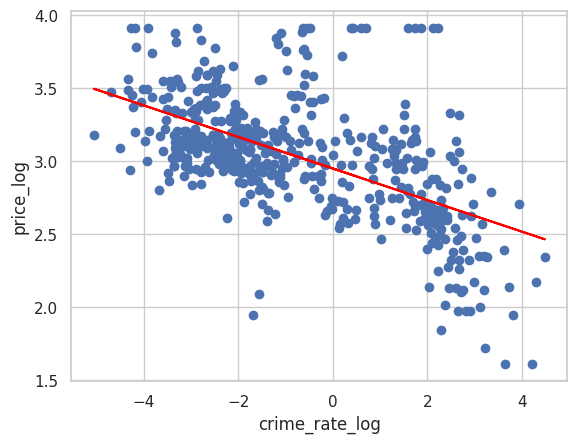

In [10]:
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

x_train_ls, x_test_ls, y_train_ls, y_test_ls = train_test_split(df[['crime_rate_log']],df['price_log'], test_size=0.3, random_state=0)

lm = smf.ols(formula = 'price_log ~ crime_rate_log', data = df).fit()
#print(lm.summary())

#Visualizando el modelo creado
plt.scatter(df['crime_rate_log'], df['price_log'])

# Graficamos la linea de regresion ajustada
plt.plot(x_train_ls, lm.predict(x_train_ls), color='red')
plt.xlabel("crime_rate_log")
plt.ylabel("price_log")

y_train_a_ls = lm.predict(x_train_ls)
y_test_a_ls = lm.predict(x_test_ls)

# Calcular las métricas de precisión
rtrain_ls = r2_score(y_train_ls,y_train_a_ls)
rtest_ls  = r2_score(y_test_ls,y_test_a_ls)

mse_train_ls = mean_squared_error(y_train_ls, y_train_a_ls)
mse_test_ls = mean_squared_error(y_test_ls, y_test_a_ls)

mae_train_ls = mean_absolute_error(y_train_ls, y_train_a_ls)
mae_test_ls = mean_absolute_error(y_test_ls, y_test_a_ls)

# Mostrar los resultados
print("Los resultados para regresión lineal: ")
print(f"\nIntercepto: 2.9503 , coeficiente: -0.1080") #datos extraidos del summary
print(f"El R^2 en training es:{rtrain_ls} y en test es:{rtest_ls}")
print(f"El MSE en training es:{mse_train_ls} y en test es:{mse_test_ls}")
print(f"El MAE en training es:{mae_train_ls} y en test es:{mae_test_ls}")

In [11]:
#intervalo de confianza
from sklearn.metrics import mean_squared_error
from math import sqrt

error = sqrt(mean_squared_error(y_test_ls, y_test_a_ls))
error

0.3438927157467883

Nuestro intervalo de confianza:

    (y ± 0.3438)
  Donde y es el valor que predice el modelo

###Regresión lineal (Sklearn)

Intercepto: 3.0440744319180153, coeficiente: [-0.23313296]
Los resultados: 
El R^2 en training es:0.3322716237042167 y en test es:0.31230925833116363
El MSE en training es:0.1092229623951064 y en test es:0.11838082669506016
El MAE en training es:0.24909643569461073 y en test es:0.2540459813039169


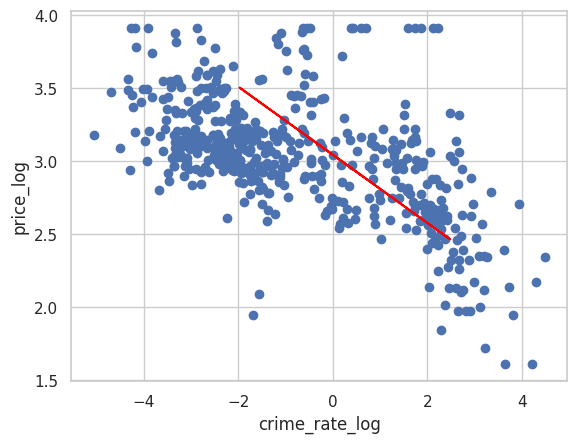

In [12]:
# Ahora con sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(df[['crime_rate_log']],df['price_log'], test_size=0.3, random_state=0)

#Rescalamos los datos antes de entrenar al modelo
sc = StandardScaler()
x_train = sc.fit_transform(x_train) #escalamos el set de entrenamiento
x_test = sc.transform(x_test) #escalamos el set de prueba

lm2 = LinearRegression()
lm2.fit(x_train,y_train)

#con el modelo creado, podemos predecir los valores en y
y_train_a = lm2.predict(x_train)
y_test_a = lm2.predict(x_test)

#Visualizando el modelo creado
plt.scatter(df['crime_rate_log'], df['price_log'])

# Graficamos la linea de regresion ajustada
plt.plot(x_train, lm2.predict(x_train), color='red')
plt.xlabel("crime_rate_log")
plt.ylabel("price_log")

print(f"Intercepto: {lm2.intercept_}, coeficiente: {lm2.coef_}")

# Calcular las métricas de precisión
rtrain = r2_score(y_train,y_train_a)
rtest  = r2_score(y_test,y_test_a)

mse_train = mean_squared_error(y_train, y_train_a)
mse_test = mean_squared_error(y_test, y_test_a)

mae_train = mean_absolute_error(y_train, y_train_a)
mae_test = mean_absolute_error(y_test, y_test_a)

# Mostrar los resultados
print("Los resultados: ")
print(f"El R^2 en training es:{rtrain} y en test es:{rtest}")
print(f"El MSE en training es:{mse_train} y en test es:{mse_test}")
print(f"El MAE en training es:{mae_train} y en test es:{mae_test}")

En este caso el intervalo de confianza sólo es para el método OLS pues obtuvo mejores resultados que la regresión lineal por Sklearn

###Regresión lineal (K-NN)

Text(0, 0.5, 'Tasa de error')

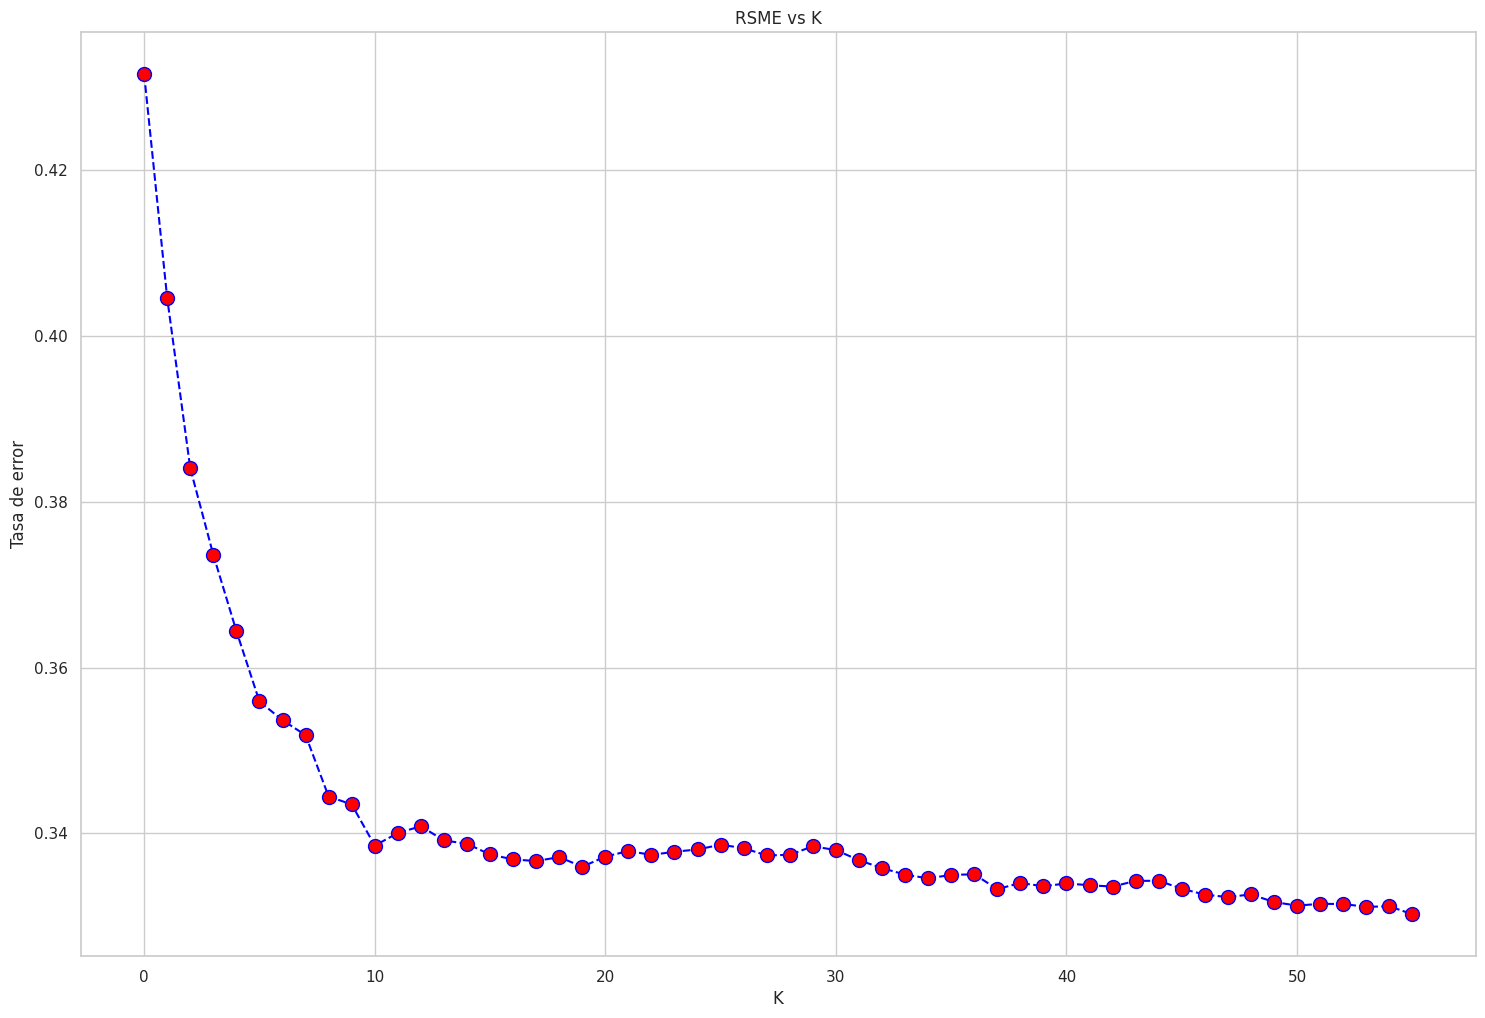

In [13]:
from sklearn import preprocessing #para re-escalar los datos

#Buscando la mejor K
x_train_knn, x_test_knn, y_train_knn, y_test_knn = train_test_split(df[['crime_rate_log']],df['price_log'], test_size=0.3, random_state=0)

# Escalamos los datos
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_knn = sc.fit_transform(x_train_knn) #escalamos el set de entrenamiento
x_test_knn = sc.transform(x_test_knn) #escalamos el set de prueba

from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_val = [] #almacenaremos los diferentes valores de k
for K in range(56):
  K += 1
  model = neighbors.KNeighborsRegressor(n_neighbors=K)
  model.fit(x_train_knn, y_train_knn)
  pred = model.predict(x_test_knn)
  error = sqrt(mean_squared_error(y_test_knn, pred))
  rmse_val.append(error)

#graficaremos el arreglo para encontrar el error minimo y la k optima
plt.figure(figsize=(18,12))
plt.plot(rmse_val, color = "blue", linestyle="dashed", marker="o",
         markerfacecolor = "red", markersize=10)
plt.title("RSME vs K")
plt.xlabel("K")
plt.ylabel("Tasa de error")

####Ahora que tenemos k optima = 54 evaluaremos el modelo

Los resultados para KNN: 
El R^2 en training es:0.41577442407560306 y en test es:0.36302048447058777
El MSE en training es:0.09556408020794302 y en test es:0.10965126773875233
El MAE en training es:0.2354843791416077 y en test es:0.24567227590967095


Text(0, 0.5, 'price_log')

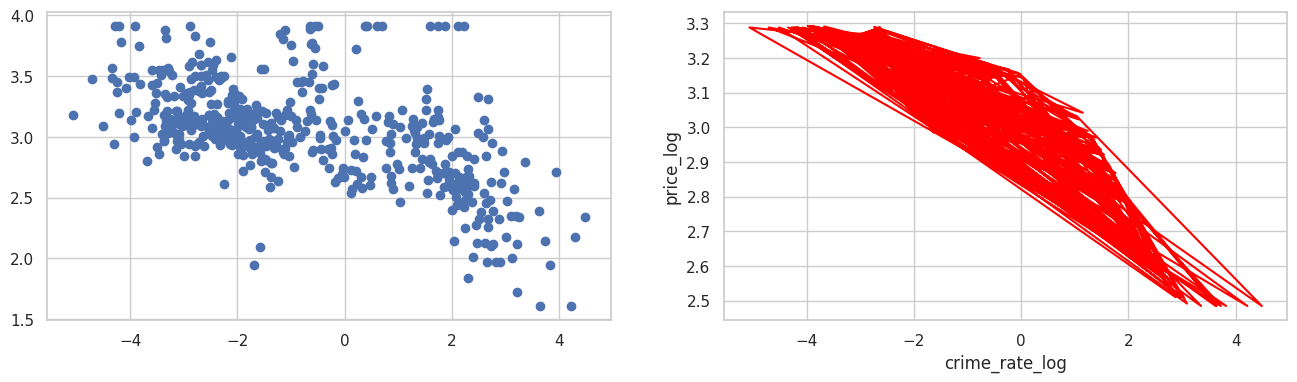

In [14]:
#Para crear el modelo K-NN
from sklearn.neighbors import KNeighborsRegressor
x_train_knn, x_test_knn, y_train_knn, y_test_knn = train_test_split(df[['crime_rate_log']],df['price_log'], test_size=0.3, random_state=0)

knn_ev = KNeighborsRegressor(n_neighbors=54)
regressor = knn_ev.fit(x_train_knn, y_train_knn)

#La predicción del modelo construido
y_predict_train_knn = regressor.predict(x_train_knn)
y_predict_test_knn = regressor.predict(x_test_knn)

# Calcular las métricas de precisión
rtrain_knn = r2_score(y_train_knn,y_predict_train_knn)
rtest_knn  = r2_score(y_test_knn,y_predict_test_knn)

mse_train_knn = mean_squared_error(y_train_knn, y_predict_train_knn)
mse_test_knn = mean_squared_error(y_test_knn, y_predict_test_knn)

mae_train_knn = mean_absolute_error(y_train_knn, y_predict_train_knn)
mae_test_knn = mean_absolute_error(y_test_knn, y_predict_test_knn)

# Mostrar los resultados
print("Los resultados para KNN: ")
print(f"El R^2 en training es:{rtrain_knn} y en test es:{rtest_knn}")
print(f"El MSE en training es:{mse_train_knn} y en test es:{mse_test_knn}")
print(f"El MAE en training es:{mae_train_knn} y en test es:{mae_test_knn}")

# Graficamos la linea de regresion
fig = plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
plt.scatter(df['crime_rate_log'], df['price_log'])
plt.subplot(1,2,2)
plt.plot(x_train_knn, y_predict_train_knn, color='red')
plt.xlabel("crime_rate_log")
plt.ylabel("price_log")

###Conclusiones

A diferencia del primer dataset analizado, en este caso si pudimos realizar transformaciones a los datos que nos ayudaron a formar una mejor correlación, por tanto, una mejor regresión lineal, no obstante el modelo generado por K-NN volvió a ponerse por encima en las métricas consideradas para evaluar los modelos.